In [1]:
# libraries
import csv
import pandas as pd
import numpy as np
from random import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## 1. The Dataset: German Credit Data

#### The German Credit dataset is a classification dataset: it is used for a prediction task where the goal is to determine whether _____
#### The list of attributes is as follows:
- output variable: **result**, credit risk - good (1), bad (2)
- input features:      
    - **status_checking**: Status of existing checking account (... < 0 DM, 0 <= ... < 200 DM, ... >= 200 DM, no checking account)
    - **duration**: duration in month (numerical)
    - **credit_hist**: Credit history (no credits taken/all credits paid back duly, all credits at this bank paid back duly, existing credits paid back duly till now, delay in paying off in the past, critical account/other credits existing)
    - **purpose**: Purpose (car (new), car (used), furniture/equipment, radio/television, domestic appliances, repairs, education, (vacation - does not exist?), retraining, business, others)
    - **credit_amt**: Credit amount (numerical)
    - **savings**: Savings account/bonds (... < 100 DM, 100 <= ... < 500 DM, 500 <= ... < 1000 DM, ... >= 1000 DM, unknown/no savings account)
    - **employment_len**: Present employment duration (unemployed, ... < 1 year, 1 <= ... < 4 years, 4 <= ... < 7 years, ... >= 7 years)
    - **installment_rate**: Installment rate in percentage of disposable income (numerical)
    - **sex_marital_status** Sex and personal status (male : divorced/separated, female : divorced/separated/married, male : single, male : married/widowed, female : single)
    - **debtors_guarantors**: Other debtors/guarantors (none, co-applicant, guarantor)
    - **residency_len**: Present residence since (numnerical)
    - **property**: Property (real estate, building society savings agreement/life insurance, car or other, unknown/no property)
    - **age**: Age in years (numerical)
    - **installment_plans**: Other installment plans (bank, stores, none)
    - **housing**: Housing (rent, own, for free)
    - **credits_at_bank**: Number of existing credits at this bank (numerical)
    - **job**: Job (unemployed/unskilled - non-resident, unskilled - resident, skilled employee/official, management/self-employed/highly qualified employee/officer
    - **num_liable**: NUmber of people being liable to provide maintenance for (numerical)
    - **telephone**: Telephone (none, yes)
    - **foreign_worker**: Foreign worker (yes, no)



In [2]:
df = pd.read_csv("german_data.csv")
df.fillna('', inplace=True)

# isolate response variable
result_index = list(df.columns).index("result")
train_cols = list(df.columns[0:result_index]) + list(df.columns[result_index+1:])
label = df.columns[result_index]
X_df = df[list(train_cols)]
y_df = df[label]


dataset = {
    'X': X_df,
    'y': y_df
}

df.head()

,status_checking,duration,credit_hist,purpose,credit_amt,savings,employment_len,installment_rate,sex_marital_status,debtors_guarantors,...,property,age,installment_plans,housing,credits_at_bank,job,num_liable,telephone,foreign_worker,result
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2


In [3]:
# Use this cell for any data-related exploration

## 2. The Model: GAMs

In [4]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split

# create a train/test split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(dataset['X'],dataset['y'], test_size=0.25, random_state=seed)

# train a GAM for the training dataset
ebm = ExplainableBoostingClassifier()

ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(feature_names=['status_checking', 'duration',
                                             'credit_hist', 'purpose',
                                             'credit_amt', 'savings',
                                             'employment_len',
                                             'installment_rate',
                                             'sex_marital_status',
                                             'debtors_guarantors',
                                             'residency_len', 'property', 'age',
                                             'installment_plans', 'housing',
                                             'credits_at_bank', 'job',
                                             'num_liable', 'telephone',
                                             'foreign_worker',
                                             'duration x savings',
                                             'du...
                                      

In [5]:
#Training accuracy
train_pred = ebm.predict(X_train).tolist()
same_train = sum(x == y for x, y in zip(train_pred, y_train.tolist()))
accuracy_train = round(same_train/ len(train_pred), 5)

#Test set accuracy
test_pred = ebm.predict(X_test).tolist()
same_test = sum(x == y for x, y in zip(test_pred, y_test.tolist()))
accuracy_test = round(same_test/ len(test_pred), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

indices = [index for index, value in enumerate(zip(test_pred, y_test.tolist())) if value[0] != value[1]]

The accuracy of the model on the training set is:  0.86267
The accuracy of the model on the test set is:  0.752


### Visualize Global Explanations: What the model learned overall from training data

In [6]:
from interpret import show 

ebm_global = ebm.explain_global()
show(ebm_global)

/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


<!-- http://127.0.0.1:7001/140645845405856/ -->

### Visualize Local Explanations: How an individual prediction was made

In [22]:
ebm_local = ebm.explain_local(X_test[:15], y_test[:15], name = 'EBM')
show(ebm_local)

<!-- http://127.0.0.1:7001/140647091440608/ -->

#### Local predictions

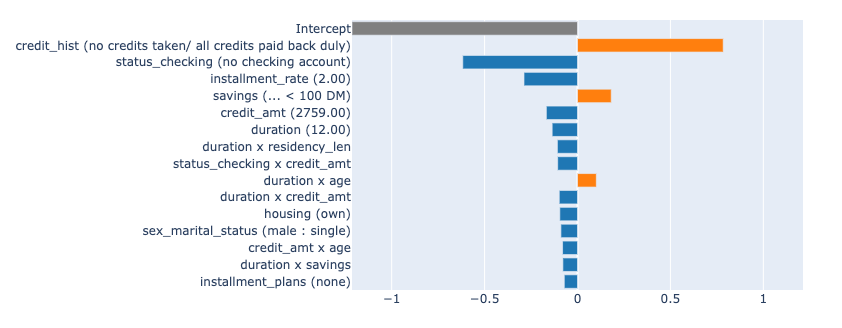

#### Local misclassification

In [26]:
ebm_local = ebm.explain_local(X_test[5:6], y_test[5:6], name='EBM')
show(ebm_local)

<!-- http://127.0.0.1:7001/140647071947600/ -->